# Central Tendency 

In [1]:
# importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style('darkgrid')

In [2]:
data_ct = pd.read_excel(".../data analytics with python/Central Tendency/IBM-313 Marks.xlsx")

In [3]:
# view the data

data_ct.head(10)

,S.No.,MTE (25),Mini Project (25),Total (50),ETE (50),Total
0,1,5.00,20,25.00,12.0,37.00
1,2,11.05,20,31.05,26.0,57.05
2,3,8.10,20,28.10,14.0,42.10
3,4,6.00,10,16.00,13.0,29.00
4,5,11.35,20,31.35,17.0,48.35
5,6,11.00,20,31.00,24.0,55.00
6,7,10.50,15,25.50,18.0,43.50
7,8,9.00,15,24.00,14.0,38.00
8,9,4.00,15,19.00,19.0,38.00
9,14,8.50,10,18.50,13.0,31.50


In [4]:
data_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              79 non-null     int64  
 1   MTE (25)           79 non-null     float64
 2   Mini Project (25)  79 non-null     int64  
 3   Total (50)         79 non-null     float64
 4   ETE (50)           77 non-null     float64
 5   Total              79 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 3.8 KB


#### Q.What are the max and min values?

In [5]:
data_ct['Total'].max()

94.5

In [6]:
data_ct['Total'].min()

0.0

So , the range of values that I am looking at is from 0 to 94.5

#### Q. What is the mean and median marks of the total column?

In [7]:
mean = np.mean(data_ct['Total'])
print(mean)

46.90632911392405


In [8]:
median = np.median(data_ct['Total'])
print(median)

45.0


So, here Mean is greater than the Median( This also gives a hint that the data is right skewed) which shows that there must be outliers which has affected the mean and hence it is greater. Also since median is low i.e. 45 it means that very few people have got higher score say in the range 80-100.

This becomes clear if we draw a boxplot

<AxesSubplot:xlabel='Total'>

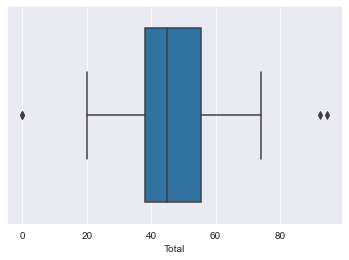

In [9]:
sns.boxplot(data=data_ct,x='Total')

#### Prediction about skewness 

From the diagram since Median is slighlty towards the first quartile value , the distribution for Total is Positively skewed or Right skewed slightly.

We can assure this by the following command:

In [10]:
from scipy.stats import skew
skew(data_ct['Total']) #positive but slight 

0.10226407464884266

<AxesSubplot:xlabel='Total', ylabel='Count'>

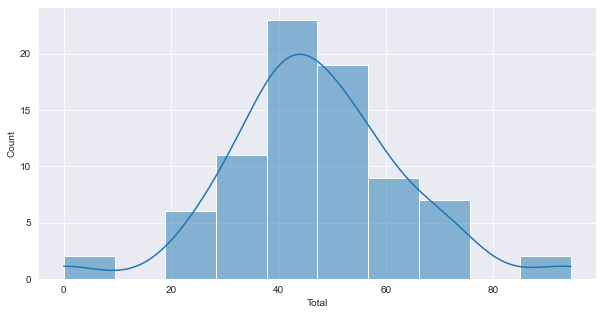

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data_ct, x='Total', kde=True, bins =10)

#### Q. What about the mode ?

Mode is nothing but the Total value which has the maximum frequency

In [12]:
data_ct['Total'].value_counts()

0.0     2
38.0    2
39.7    2
42.7    2
41.0    2
       ..
59.4    1
50.1    1
42.1    1
25.7    1
37.0    1
Name: Total, Length: 72, dtype: int64

In [13]:
data_ct.nunique()

S.No.                79
MTE (25)             65
Mini Project (25)     6
Total (50)           65
ETE (50)             31
Total                72
dtype: int64

Total has 72 unique values out of 79 which means finding a single value as mode is meaningless and also there is not a single mode 

Thus I need grouping to develop a meaningful mode 

In [29]:
Total_groups = pd.cut(data_ct['Total'], bins=10, precision =0)
data_ct.groupby(Total_groups)['Total'].count()

Total
(-0.1, 9.0]      2
(9.0, 19.0]      0
(19.0, 28.0]     6
(28.0, 38.0]    11
(38.0, 47.0]    23
(47.0, 57.0]    19
(57.0, 66.0]     9
(66.0, 76.0]     7
(76.0, 85.0]     0
(85.0, 94.0]     2
Name: Total, dtype: int64

 So , we conculde that maximum number of students got total marks between 38-47

#### Calculating the percentile 

In [69]:
Total_percentile = np.percentile(data_ct['Total'],np.arange(25,100,25))
Total_percentile

array([38.   , 45.   , 55.375])

So, about 75% of the students got less than 56 marks in the exam in Total 

#### Q. What is the precision of the Total values?

In [70]:
np.var(data_ct['Total'])

262.78147892965876

In [71]:
import statistics
statistics.pstdev(data_ct['Total']) # population standard deviation 

16.210536046955966

In [73]:
statistics.stdev(data_ct['Total']) # sample standard deviation 

16.31411880088133

Standard deviation is the measure of dispersion of a set of data from its mean. It measures the absolute variability of a distribution; the higher the dispersion or variability, the greater is the standard deviation and greater will be the magnitude of the deviation of the value from their mean.

Here the standard deviation is around 16(>1) which means that there is great variability and the distributuion is spread out 